# Decision Trees und Random Forests

Bitte beziehe dich zusätzlich auf die Video-Lektion, um mehr über Decision Trees (Entscheidungsbäume) und Random Forests zu lernen. Dieses Notebook dient als Code-Referenz für die Lektion.

## Einen Entscheidungsbaum erstellen

Es kann sein, dass du zuerst noch die `rpart` Library installieren musst. Zusätzliche Informationen zu dieser Library gibt es [hier](https://cran.r-project.org/web/packages/rpart/rpart.pdf).

In [1]:
# install.packages("rpart")


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//RtmpxoVzgu/downloaded_packages


In [2]:
library(rpart)

Warning message:
“package ‘rpart’ was built under R version 3.4.3”

Wir können anschließend die `rpart()` Funktion verwenden, um einen Decision Tree zu bauen:

**rpart(formula, data=, method=, control=) where**
* Die "formula" schreiben wir im Format: ergebnis ~ predictor1+predictor2+predictor3+etc.
* data= spezifiziert den Dataframe
* method= "class" für einen Klassifizierungsbaum
* method= "anova" für einen Regressionsbaum
* control= Optionaler Parameter um das Wachstum des Baums zu steuern
    * Zum Beispiel `control=rpart.control(minsplit=30, cp=0.001)` sorgt dafür, dass das Minimum an Beobachtungen in einem Knoten 30 Beobachtungen sind, bevor eine Teilung erfolgt. Und zusätzlich, dass eine Trennung den Fit des Modells um mindestens 0.001 (cost of complexity factor) verbessert.

## Beispieldaten

Wir werden die [Kyphosis](https://stat.ethz.ch/R-manual/R-devel/library/rpart/html/kyphosis.html) (dt. Wirbelsäulenkrümmung) Daten verwenden. Dieser Dataframe beinhaltet 81 Zeilen und 4 Spalten, die die Daten von Kindern dokumentieren, die eine Operation ihrer Wirbelsäule erhalten. Es beinhaltet die folgenden Spalten:
* Kyphosis: Ein Faktor, der beschreibt ob eine Kyphosis nach der Operation noch vorgelegen hat (present) oder nicht (absent)
* Age: Alter in Monaten
* Number: Anzahl der involvierten Wirbel
* Start: Nummer des ersten (obersten) Wirbel von dem ausgehend operiert wurde

Schauen wir uns zusätzlich die Struktur an:

In [3]:
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [4]:
head(kyphosis)

Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16


In [5]:
tree <- rpart(Kyphosis ~ . , method='class', data= kyphosis)

## Das Entscheidungsbaummodell auswerten

Es gibt viele Funktionen, die wir nutzen können, um das Modell auszuwerten:

</table></p>

<table >
<tr>
<td><strong>printcp(</strong><em>fit</em><strong>) </strong></td>
<td>Zeige die cp Tabelle</td>
</tr>
<tr>
  <td><strong>plotcp(</strong><em>fit</em><strong>) </strong></td>
  <td>Plotte die Cross-Validation Ergebnisse</td>
  </tr>
<tr>
  <td><strong>rsq.rpart(</strong><em>fit</em><strong>)</strong></td>
  <td>Plotte den angenäherten R-Quadrat und relativen Fehler für verschiedene Splits. Die Beschriftung ist nur für die "anova" Methode korrekt.</td>
  </tr>
<tr>
  <td><strong>print(</strong><em>fit</em><strong>) </strong></td>
  <td>Zeige die Ergebnisse</td>
  </tr>
<tr>
  <td><strong>summary(</strong><em>fit</em><strong>)</strong></td>
  <td>Detaillierte Ergebnisse inklusive ersetzter Splits</td>
  </tr>
<tr>
  <td><strong>plot(</strong><em>fit</em><strong>) </strong></td>
  <td>Plotte den Entscheidungsbaum</td>
  </tr>
<tr>
  <td><strong>text(</strong><em>fit</em><strong>) </strong></td>
  <td>Beschrifte den Entscheidungsbaum</td>
  </tr>
<tr>
  <td><strong>post(</strong><em>fit</em>, <strong>file=)</strong> </td>
  <td>Erstelle ein "Postscript plot" des Entscheidungsbaums</td>
  </tr>
</table>

Betrachten wir einige davon:

In [6]:
printcp(tree)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error  xerror    xstd
1 0.176471      0   1.00000 1.00000 0.21559
2 0.019608      1   0.82353 0.82353 0.20018
3 0.010000      4   0.76471 0.82353 0.20018


## Baum Visualisierung

Es gibt einige eingebaute Visualisierungsmöglichkeiten, die wir in der Tabelle oberhalb aufgeführt haben. Sie sehen allerdings nicht besonders schön aus:

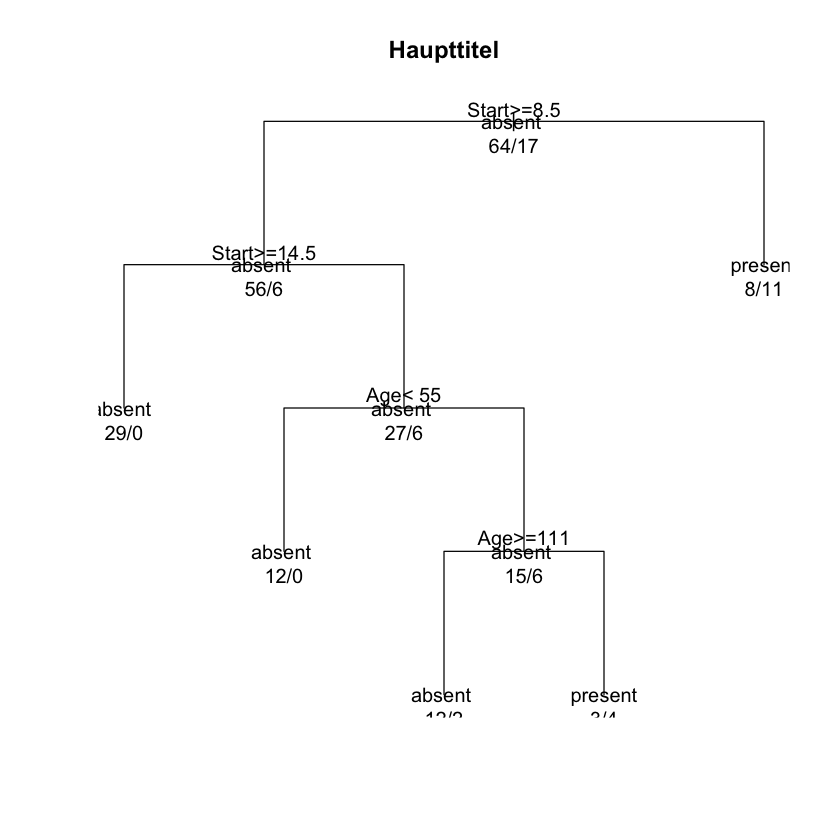

In [7]:
plot(tree, uniform=TRUE, main="Haupttitel")
text(tree, use.n=TRUE, all=TRUE)

Die `rpart.plot` Library macht diese Visualisierungen viel besser.

In [8]:
# install.packages('rpart.plot')


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//RtmpxoVzgu/downloaded_packages


In [9]:
library(rpart.plot)

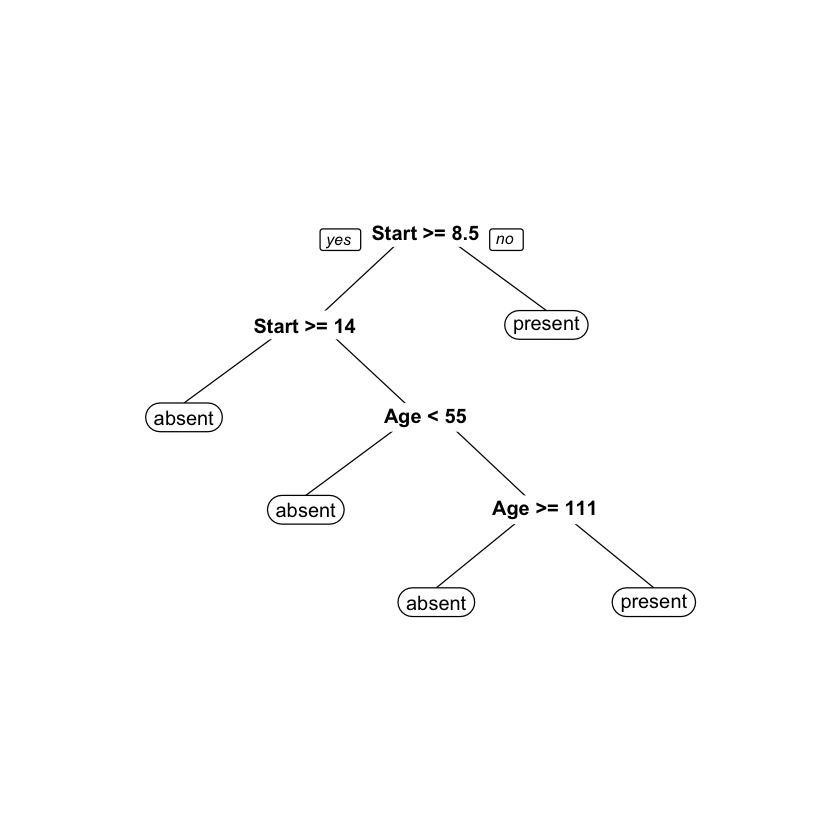

In [10]:
prp(tree)

## Einen Random Forest erstellen

Random Forests verbessern die Vorhersagegenauigkeit indem sie eine große Anzahl an Entscheidungsbäumen nach dem Bootstrap-Verfahren erstellen. Anschließend wird jeder Baum in diesem "Wald" klassifiziert und darüber entschieden, wir das finale Vorhersageergebnis aussehen soll. Dazu werden die Ergebnisse der vielen Bäume kombiniert. Entweder als Durchschnitt für die Regression oder als Mehrheitsentscheid in der Klassifizierung.

Wir können die `randomForest` Library verwenden, um einen Random Forest zu erstellen:

In [12]:
# install.packages("randomForest")


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//RtmpxoVzgu/downloaded_packages


In [13]:
# Random Forest Vorhersage der Kyphosis Daten
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [14]:
model <- randomForest(Kyphosis ~ .,   data=kyphosis)

In [15]:
print(model) # Ergebnis anzeigen


Call:
 randomForest(formula = Kyphosis ~ ., data = kyphosis) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 20.99%
Confusion matrix:
        absent present class.error
absent      58       6   0.0937500
present     11       6   0.6470588


In [16]:
importance(model) # Wichtigkeit jedes Predictors

,MeanDecreaseGini
Age,8.354338
Number,5.325013
Start,10.225547


## Schlussfolgerung

Ihr solltet euch nun wohl damit fühlen, die Syntax für Entscheidungsbäume und Random Forests anzugeben. Wie immer liegt die wahre Fähigkeit darin, die Theorie hinter den Modellen zu verstehen und deren Angemessenheit einschätzen zu können. Die Syntax solltest du nun schon gemeistert haben.

# Gut gemacht!